# 星火预习题目

⛔️ 内部资料，严禁转发

可通过[Tensorcircuit官方文档](https://tensorcircuit.readthedocs.io)等来源查询并学习包括符号意义、API使用方法等信息。

1-4 的题目最好在正式参与星火活动前完成，有余力这也可以尝试选做题。

## 1 环境配置

配置一个支持 Python 的环境和相应的 Python 软件包，使得至少可以跑通如下代码：

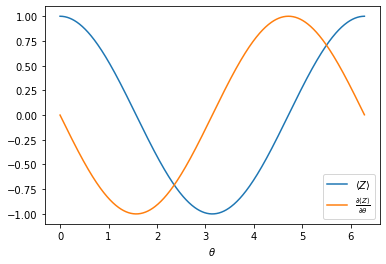

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import tensorcircuit as tc

K = tc.set_backend("tensorflow")


@K.jit
def exp_z(param):
    c = tc.Circuit(1)
    c.rx(0, theta=param)
    return K.real(c.expectation_ps(z=[0]))


grad_z = K.grad(exp_z)

params = K.convert_to_tensor(np.arange(0, 2 * np.pi, 0.01))

plt.plot(params, [exp_z(param) for param in params], label=r"$\langle Z\rangle$")
plt.plot(
    params,
    [grad_z(param) for param in params],
    label=r"$\frac{\partial \langle Z\rangle}{\partial \theta}$",
)
plt.legend()
plt.xlabel(r"$\theta$")
plt.show()

## 2 向量和矩阵

### 2-1 旋转矩阵

考虑初始向量 $ v=(1, 0) $ ，给定二维矩阵 $$R(\theta) = \begin{pmatrix} \cos\theta &\sin\theta \\ -\sin\theta & \cos\theta \end{pmatrix}$$，
利用 Numpy 程序实现矩阵乘向量的计算 $v'=R(\theta)v$。通过可视化找到这一向量变化的几何意义。

### 2-2 矩阵指数

理解矩阵指数的含义，程序实现 $e^{i \hat P}$, $\hat{P}=\sigma_x, \sigma_y, \sigma_y$. $\sigma_x, \sigma_y, \sigma_y$ 是 $2*2$ 泡利矩阵。

考虑泰勒级数展开，试证明 $e^{i\theta\hat{P}} = \cos(\theta) I + \mathrm{i}\sin(\theta) \hat{P}$，并程序验证该公式的正确性。

根据解析证明，讨论以上矩阵欧拉公式成立对矩阵 $\hat{P}$ 形式的限制。

### 2-3 矩阵关于向量的期望

定义矩阵 $\hat{Q}$ 关于列向量 $v$ 的期望为以下标量：$$v^\dagger \hat{Q} v$$。
考虑 $v(\theta)=e^{i\theta/2\hat{P}}v_0$, $v_0=(1, 0)$, 且 $\hat{P}, \hat{Q}$ 均是泡利矩阵，实现程序计算该期望。

函数前两个输入为 0,1,2 之一的整数，分别确定 P 和 Q 是哪一个泡利矩阵，第三个输入为参数浮点数 $\theta$, 函数的输出为$\hat{Q}$在$\hat{v}$上的期望值。

可视化出不同泡利矩阵组合下期望随参数$\theta$变化的曲线，讨论其规律。

### 2-4 张量积

理解矩阵张量积的含义，$X\otimes I\otimes I\otimes Z$ 可简记为 $X_0Z_3$。
程序生成如下矩阵（输入 n）：

$$H = \sum_{i=0}^{n-1} Z_i\otimes I_{n-i-1} + \sum_{i=0}^{n-2} X_i\otimes I_{n-i-1}X_{i+1}\otimes I_{n-i} ,$$

并求该矩阵 $H$ 在向量 $(1,0,0,....)$ 下的期望值。

### 2-5 狄拉克符号

记列向量 $\vert 0\rangle = \begin{pmatrix}1\\0 \end{pmatrix}$, $\vert 1\rangle = \begin{pmatrix}0\\1 \end{pmatrix}$, $\vert 00\rangle = \begin{pmatrix}1\\0\\0\\0 \end{pmatrix}$，尝试用 Dirac 符号的语言，重写上述小节涉及的矩阵关系和定义式。并写出 $\frac{1}{\sqrt{2}}(\vert 010\rangle -\vert 101\rangle)$ 代表的列向量。

### 2-6 使用Tensorcircuit后端

使用`Tensorcircuit`的`Tensorflow`或`JAX`后端API重写本小节（§2）所有题目

提示：可以使用调用后端`K = tc.set_backend("tensorflow")`，具体使用方法可以参考 1-环境配置 与[Tensorcircuit官方文档](https://tensorcircuit.readthedocs.io)

## 3 导数与梯度下降

### 3-1 数值微分

给定任意计算机函数 ``f``， 其输出是一个数值，输入是一个向量，实现一个函数来计算 ``f`` 关于输入向量各分量的导数。这里可以采用数值差分的方式近似实现，也即 $$(f(x+\delta)-f(x))/\delta$$

### 3-2 三角函数数值微分

若上述黑盒函数 $f=A\sin(x + B)+C$，通过解析推导找到是否存在严格的数值差分和解析导数相同，也即 $$f'(x) = (f(x+\delta)-f(x-\delta))/\tau$$ 对应的 $\delta, \tau$， 这一方法被称为参数平移。

### 3-3 单比特参数平移

若 $f= \langle 0\vert e^{-i\theta/2\hat{P_1}}P_2e^{i\theta/2\hat{P_1}}\vert 0\rangle$，其中$\hat{P_1}, \hat{P_2}$均为泡利矩阵。尝试用数值微分或参数平移的办法估算 f 对 $\theta$ 的导数。此时参数平移法给出的导数是否正确，为什么？

$f(\theta)$ 是否有周期性？请通过数值观察和理论推导，给出 $f(\theta)$ 化简的解析表达式。

### 3-4 梯度下降

梯度下降是优化函数的常见方法。利用前边我们已知的导数求解方案，结合梯度下降的循环并对1.1给出的代码分析，尝试编程（使用`Tensorflow`后端）寻找 1.3.3 中函数 $f$ 的最小值。

## 4 测量

### 4-1 线路期望计算

给定以下线路，试利用 TensorCircuit API 计算其期望 $\langle Z_0Z_1 \rangle$。

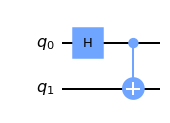

In [2]:
c = tc.Circuit(2)
c.h(0)
c.cx(0, 1)
c.draw(output="mpl")

### 4-2 基于测量结果近似期望

利用 TensorCircuit API 对以上线路进行若干次测量，得到一些 0 1 的比特串的结果，并尝试利用这些测量的 bitstring 来估计期望 $\langle Z_0Z_1 \rangle$。

### 4-3 测量不确定度

上一小问基于测量结果的期望估计和 4-1 的严格结果有一定差异，请分析这一差异随测量次数的标度规律。

## OPT-1 选做 Grover Search

Grover search 是利用量子计算机来搜索无结构问题解的平方加速方案。

**注意：** 对于该线路，由于线路深度较深且存在多比特门，我们推荐以下设置来运行模拟。

In [ ]:
import cotengra

opt = cotengra.ReusableHyperOptimizer(
    methods=["greedy", "kahypar"],
    parallel="ray",
    minimize="combo",
    max_time=12,
    max_repeats=1024,
    progbar=True,
)
tc.set_contractor("custom", optimizer=opt, contraction_info=True, preprocessing=True)

### OPT-1-1 问题oracle

考虑一个 $3*2$ 的简单格子，每个方格需要填写 0 或 1，使得相邻方格的数字不同，构造该问题的量子线路 oracle，使得输入 6 位比特串，在满足条件时，目标比特输出 1，允许使用辅助比特。

### OPT-1-2 Grover算法实现

根据以上问题 oracle ，实现 Grover 搜索线路，并根据公式给出合适的迭代次数进行测量。可视化不同迭代次数对测量得到正确结果概率的影响曲线。

## OPT-2 选做 变分优化算法

### OPT-2-1 求解方程

实现基于 TensorCircuit jax 或 tf 后端的函数，给定输入 $a, b, c, d$ 输出 $ax^3+bx^2+cx+d=0$ 的解，要求基于变分优化梯度下降的方式。

### OPT-2-2 优化点

给定一组点 $(x_i, y_i)$，要求找到坐标系上到所有点的距离和最近的点的坐标并可视化，基于变分优化梯度下降的方式。（多村庄挖井）

### OPT-2-3 优化线

给定一组点 $(x_i, y_i)$，要求找到坐标系上的一条直线到所有点的距离和最小，基于变分优化梯度下降的方式。（多村庄通公路）